In [11]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np 

# Algorithms
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns

In [12]:
df = pd.read_csv("spam.csv", encoding="ISO-8859-1")

In [13]:
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [14]:
#Drop empty columns
cols = [2,3,4]
df.drop(df.columns[cols],axis=1,inplace=True)
df.head(10)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
#Rename columns as category and message
df.rename(columns = {'v1':'Category', 'v2':'Message'}, inplace = True)
df.head(10)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [16]:
print(f'Dataset consist of {df.shape[0]} E-Mails.')

Dataset consist of 5572 E-Mails.


In [18]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

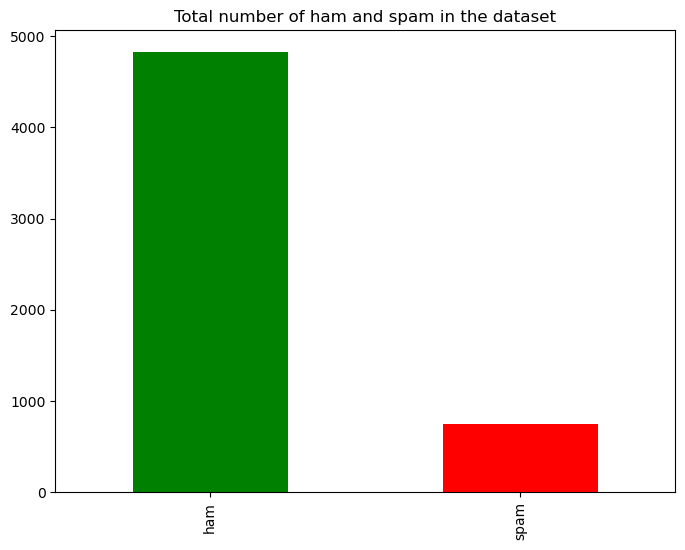

In [19]:
plt.figure(figsize=(8,6))

df['Category'].value_counts().plot.bar(color = ["green","red"])
plt.title('Total number of ham and spam in the dataset')
plt.show()

Text(0.5, 1.0, 'Ham Word Cloud')

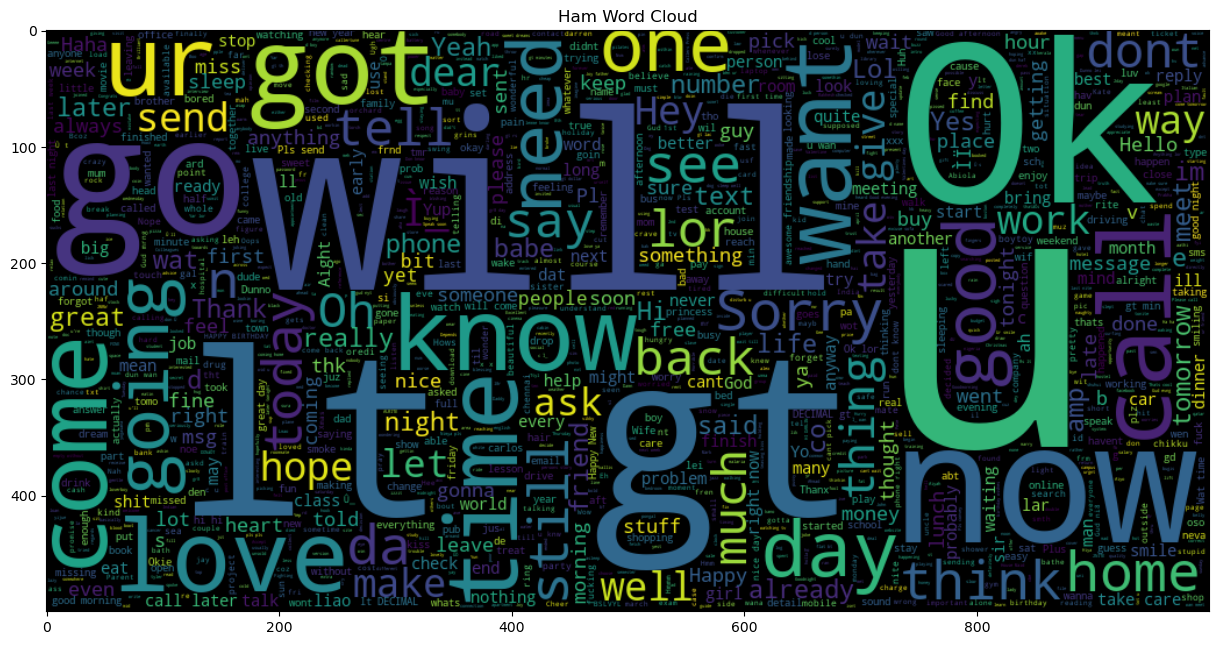

In [20]:
from wordcloud import WordCloud

plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="ham" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Ham Word Cloud")

Text(0.5, 1.0, 'Spam Word Cloud')

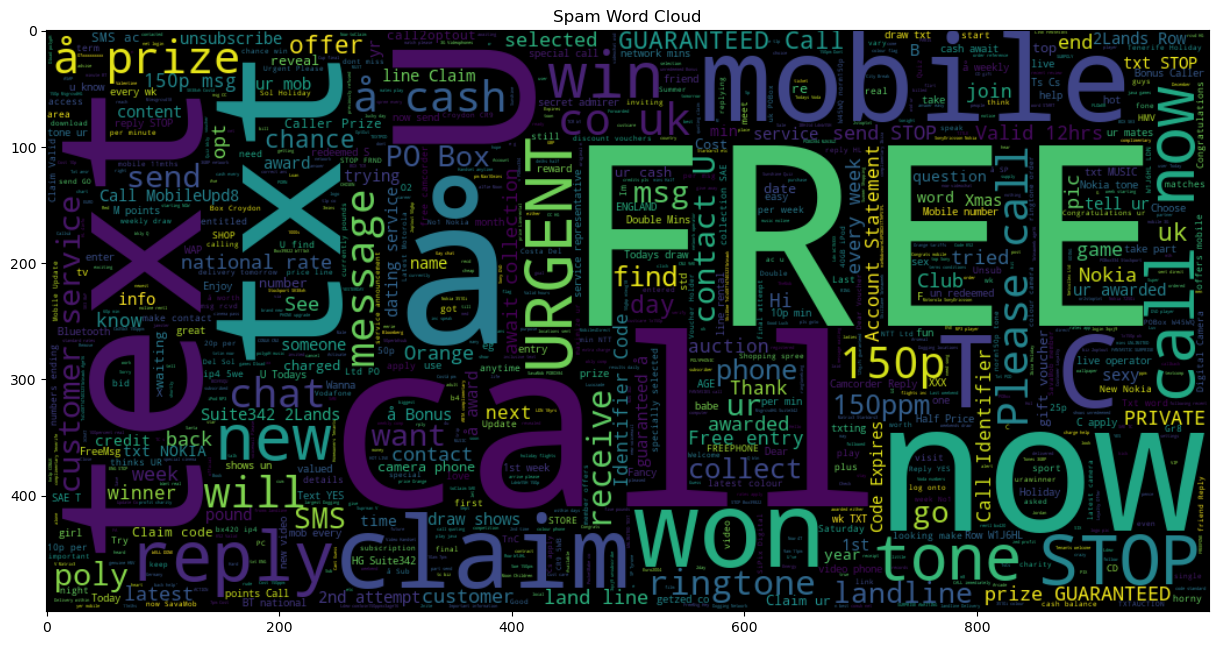

In [21]:
plt.figure(figsize = (15,15)) 
wc = WordCloud(max_words = 2000 , width = 1000 , height = 500).generate(" ".join(df[df.Category =="spam" ].Message))
plt.imshow(wc , interpolation = 'bilinear')
plt.title("Spam Word Cloud")

# Train-Test Split

In [22]:
#0: Ham, 1: Spam
df['Category']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
X=df['Message']
Y=df['Category']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

# MODELLING

SVM

Naive Bayes

KNN

# SVM

In [25]:
# Define the pipeline
clf_svm = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC())
])

In [26]:
#Fiting the algorithm
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('svc', SVC())])

In [27]:
#Make prediction on X_test
y_pred_SVM=clf_svm.predict(X_test)

In [28]:
# Calculate the accuracy score
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9798994974874372

In [29]:
# Define the hyperparameter grid
param_grid = {'svc__C': [0.1, 1, 10, 100, 1000],
              'svc__kernel': ['linear', 'rbf'],
              'svc__gamma': [0.0001, 0.001, 0.01, 0.1]}

In [30]:
# Initialize the grid search
grid_search = GridSearchCV(clf_svm, param_grid, scoring='accuracy', cv=5)

In [31]:
# Fit the grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('svc', SVC())]),
             param_grid={'svc__C': [0.1, 1, 10, 100, 1000],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1],
                         'svc__kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [32]:
# Print the best hyperparameters
print(grid_search.best_params_)

{'svc__C': 1, 'svc__gamma': 0.0001, 'svc__kernel': 'linear'}


In [33]:
# Predict on the test set
y_pred_SVM = grid_search.predict(X_test)

In [34]:
# Calculate the accuracy score
svm_acc = accuracy_score(y_test, y_pred_SVM)
svm_f1 = f1_score(y_test, y_pred_SVM)
svm_recall = recall_score(y_test, y_pred_SVM)
svm_precision = precision_score(y_test, y_pred_SVM)
print("SVM Model Metrics:")
print("Accuracy: ", svm_acc)
print("F1 Score: ", svm_f1)
print("Recall: ", svm_recall)
print("Precision: ", svm_precision)

SVM Model Metrics:
Accuracy:  0.9849246231155779
F1 Score:  0.9341692789968651
Recall:  0.8922155688622755
Precision:  0.9802631578947368


In [35]:
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_SVM)

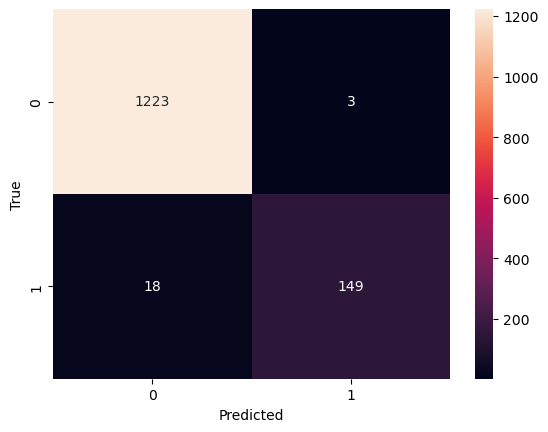

In [36]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Naive Baised

In [37]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [38]:
#Fiting the algorithm
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [39]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [40]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9827709978463748

In [41]:
param_grid = {'nb__alpha': [0.5, 1.0, 1.5]}

In [42]:
grid_search = GridSearchCV(clf_NaiveBaised, param_grid,scoring='accuracy', cv=5)

In [43]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'nb__alpha': [0.5, 1.0, 1.5]}, scoring='accuracy')

In [44]:
print("Best hyperparameters: {}".format(grid_search.best_params_))

Best hyperparameters: {'nb__alpha': 0.5}


In [45]:
y_pred_NB = grid_search.predict(X_test)

In [46]:
# Calculate the accuracy score
naive_acc = accuracy_score(y_test, y_pred_NB)
naive_f1 = f1_score(y_test, y_pred_NB)
naive_recall = recall_score(y_test, y_pred_NB)
naive_precision = precision_score(y_test, y_pred_NB)
print("Naive Baised Model Metrics:")
print("Accuracy: ", naive_acc)
print("F1 Score: ", naive_f1)
print("Recall: ", naive_recall)
print("Precision: ", naive_precision)

Naive Baised Model Metrics:
Accuracy:  0.9798994974874372
F1 Score:  0.9146341463414633
Recall:  0.8982035928143712
Precision:  0.9316770186335404


In [47]:
cm = confusion_matrix(y_test, y_pred_NB)

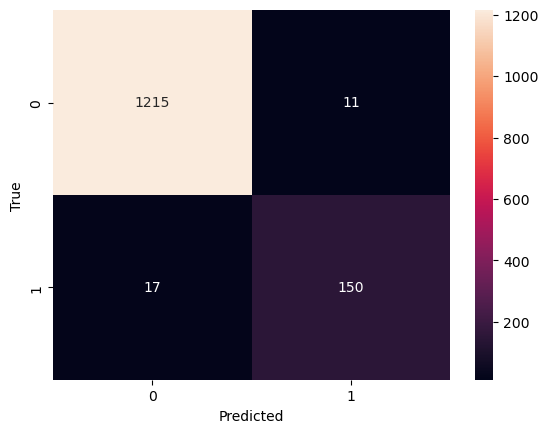

In [48]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# KNN

In [49]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [50]:
clf_knn.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier())])

In [51]:
y_pred_KNN=clf_knn.predict(X_test)

D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [52]:
knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

0.9267767408470926

In [53]:
param_grid = {'knn__n_neighbors': [3, 5, 7, 9]}

In [54]:
grid_search = GridSearchCV(clf_knn, param_grid, cv=5)

In [55]:
grid_search.fit(X_train, y_train)

D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3, 5, 7, 9]})

In [56]:
print("Best hyperparameters: {}".format(grid_search.best_params_))

Best hyperparameters: {'knn__n_neighbors': 3}


In [57]:
y_pred_KNN = grid_search.predict(X_test)

D:\Anacondanavigator\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [58]:
# Calculate the accuracy score
knn_acc = accuracy_score(y_test, y_pred_KNN)
knn_precision = precision_score(y_test, y_pred_KNN)
print("KNN Model Metrics:")
print("Accuracy: ", knn_acc)
print("Precision: ", knn_precision)

KNN Model Metrics:
Accuracy:  0.9411342426417804
Precision:  1.0


In [59]:
cm = confusion_matrix(y_test, y_pred_KNN)

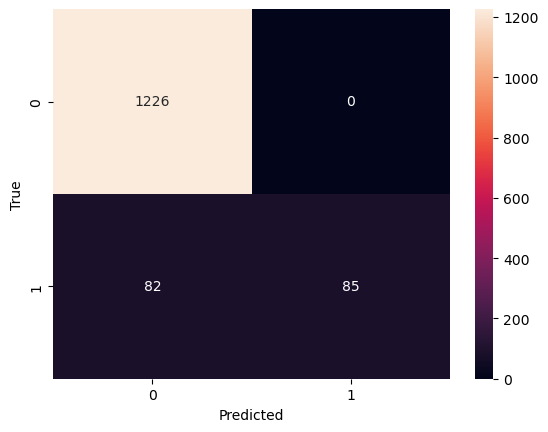

In [60]:
# Visualize the confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [61]:
menMeans = np.array([naive_acc,svm_acc,knn_acc])*100

In [62]:
ind = ['Naive Bayes','SVM','KNN']

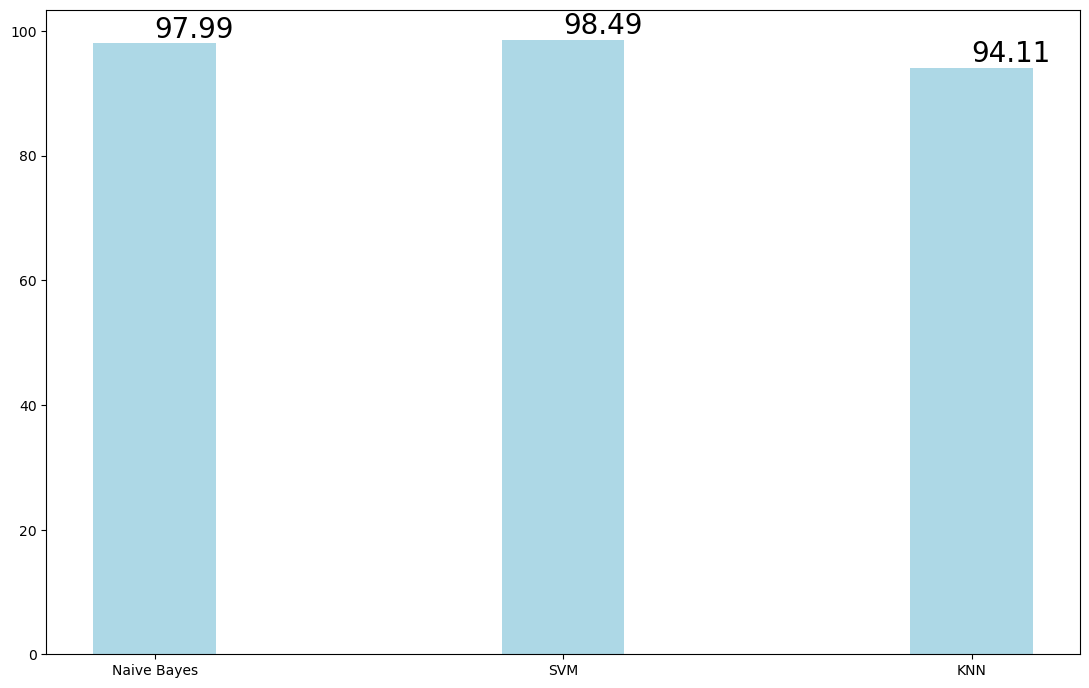

In [63]:
fig, ax = plt.subplots(figsize = (11,7))
ax.bar(ind,menMeans,width=0.3,color ='lightblue')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()

In [64]:
def spam_dect(clf,txt):
    a=clf.predict([txt])
    if a==1:
        print(f"{clf[1]} This is a Spam email \n")
    else:
        print(f"{clf[1]} This is a Real email \n")

In [70]:
message= input()

K..k:)where are you?how did you performed?


In [71]:
clf_1 = clf_NaiveBaised
clf_2 = clf_svm
clf_3 = clf_knn
i = [clf_1, clf_2,clf_3]
for x in i:
    spam_dect(x,message)

MultinomialNB() This is a Real email 

SVC() This is a Real email 

KNeighborsClassifier() This is a Real email 



In [69]:
#Let's make a predict with SVM
spam_dect(clf_svm, message)

SVC() This is a Spam email 

